In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as panda  # To read data
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score


In [2]:
dataset = panda.read_csv("https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/assignment2-machineLearning/Ruter-data.csv",delimiter=";")
dataset

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5


In [3]:
dataset["Dato"] = panda.to_datetime(dataset.Dato, format="%d/%m/%Y")

In [4]:
dataset.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,2020-08-10,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,2020-08-03,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [5]:
dataset = dataset.loc[dataset['Linjeretning'] == 0]

In [6]:
dataset = dataset.loc[dataset['Linjenavn'] == '150']

In [7]:
lower_limit, upper_limit = dataset.Passasjerer_Ombord.quantile([0.12,1])
lower_limit, upper_limit

(0.0, 29.0)

In [8]:
dataset = dataset[(dataset.Passasjerer_Ombord>=lower_limit)&(dataset.Passasjerer_Ombord<upper_limit)]
dataset.shape

(54, 17)

In [9]:
dataset = dataset.groupby(['Dato'], as_index=False).sum()
dataset = dataset.drop(['Linjeretning' , 'Kjøretøy_Kapasitet'], axis ='columns')
dataset

,Dato,Passasjerer_Ombord
0,2020-07-09,0
1,2020-07-16,12
2,2020-07-17,2
3,2020-07-21,7
4,2020-07-22,20
5,2020-07-23,12
6,2020-07-25,1
7,2020-07-26,12
8,2020-07-27,1
9,2020-07-28,28


In [10]:
dataset['Dato'] = dataset['Dato'].dt.strftime('%d%m%Y')


In [11]:
input = dataset.drop(['Passasjerer_Ombord'], axis ='columns')


In [12]:
input

,Dato
0,09072020
1,16072020
2,17072020
3,21072020
4,22072020
5,23072020
6,25072020
7,26072020
8,27072020
9,28072020


In [13]:
Passasjerer_Ombord = dataset.Passasjerer_Ombord
Passasjerer_Ombord

0      0
1     12
2      2
3      7
4     20
5     12
6      1
7     12
8      1
9     28
10     8
11    26
12     6
13    13
14     2
15     6
16    23
17    10
18     5
19     1
20     6
21     7
22     5
23     6
24     2
25    25
26     8
27     0
28    20
29    28
30     0
31     8
Name: Passasjerer_Ombord, dtype: int64

In [14]:
regObj = linear_model.LinearRegression()
regObj.fit(input,Passasjerer_Ombord)

LinearRegression()

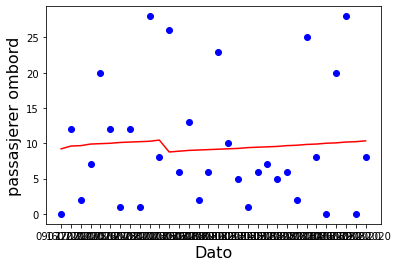

In [15]:
plt.xlabel('Dato',fontsize=16)
plt.ylabel('passasjerer ombord',fontsize=16)

plt.scatter(dataset.Dato,dataset.Passasjerer_Ombord,color='blue')
plt.plot(dataset.Dato,regObj.predict(dataset[['Dato']]),color='red')

In [16]:
regObj.predict([[31082020]])

array([10.45950387])

In [17]:
coefficient=regObj.coef_
coefficient

array([5.62595335e-08])

In [18]:
intercept=regObj.intercept_
intercept

8.71084392219145

In [19]:
coefficient*(31082020)+intercept

array([10.45950387])

In [20]:
X= dataset.iloc[:, :-1].values
y= dataset.iloc[:, -1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=0)

y_train =y_train.reshape(-1,1)
y_test =y_test.reshape(-1,1)

In [22]:
from sklearn.preprocessing import StandardScaler 

sc_X = StandardScaler()
sc_y = StandardScaler()

X_train =sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

y_test= sc_y. fit_transform(y_test)
y_train= sc_y.fit_transform(y_train)

In [23]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=500, criterion='mse', random_state=0)
model.fit(X_train, y_train)

<ipython-input-23-e16af611d313>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=500, random_state=0)

In [24]:
y_pred=model.predict(X_test)
y_pred=y_pred.reshape(-1, 1)
y_pred=sc_y.transform(y_pred)

In [25]:
from sklearn import metrics  
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test))

MAE 1.0774690647207898
MSE 2.1637574513468425
RMSE 1.4709716011354002
Score: -0.7995072261996896
